In [1]:
conda install -c conda-forge category_encoders

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import category_encoders as ce

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import _encoders
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from xgboost import 

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/mattdmeans/NFLplayData/master/NFLPlaybyPlay2015.csv', low_memory = False)

In [5]:
df['PlayType'].value_counts(normalize = True)

Pass                  0.397212
Run                   0.284181
No Play               0.056537
Kickoff               0.055605
Punt                  0.052960
Timeout               0.040300
Sack                  0.025819
Extra Point           0.024410
Field Goal            0.021418
Quarter End           0.014633
Two Minute Warning    0.010427
QB Kneel              0.009213
End of Game           0.004574
Onside Kick           0.001452
Spike                 0.001127
Half End              0.000130
Name: PlayType, dtype: float64

In [62]:
df = df[(df['PlayType'] == 'Run') | (df['PlayType'] == 'Pass') | (df['PlayType'] == 'Sack')]

In [7]:
df.isnull().sum()

Unnamed: 0       0
Date             0
GameID           0
Drive            0
qtr              0
                ..
PosTeamScore    21
DefTeamScore    21
ScoreDiff       21
AbsScoreDiff    21
Season           0
Length: 66, dtype: int64

In [8]:
features = ['Drive', 'qtr', 'down', 'TimeUnder', 'PlayTimeDiff', 'SideofField', 'yrdln', 'yrdline100', 'GoalToGo', 'posteam', 'DefensiveTeam',
           'sp', 'PlayType', 'PassLocation', 'RunLocation', 'RunGap', 'PosTeamScore', 'DefTeamScore', 'ScoreDiff']
target = 'Yards.Gained'

In [73]:
train, test = train_test_split(df, train_size = .8, test_size = .2, random_state = 42)

train.shape, test.shape

((26098, 66), (6525, 66))

In [39]:
w_features = ['Drive', 'qtr', 'down', 'TimeUnder', 'PlayTimeDiff', 'SideofField', 'yrdln', 'yrdline100', 'GoalToGo', 'posteam', 'DefensiveTeam',
           'sp', 'PlayType', 'PassLocation', 'RunLocation', 'RunGap', 'PosTeamScore', 'DefTeamScore', 'ScoreDiff', 'Yards.Gained']

In [72]:
def wrangle(X):
    X = X.copy()
    X = X[w_features]
    X.fillna(np.NaN)
    X = X.dropna(axis=0, subset=['down'])
    X = X.dropna(axis=0, subset=['PlayTimeDiff'])
    X['PassLocation'] = X['PassLocation'].fillna('None')
    X['RunLocation'] = X['RunLocation'].fillna('None')
    X['RunGap'] = X['RunGap'].fillna('None')
    return X

In [31]:
X_train.isnull().sum()

Drive                0
qtr                  0
down                95
TimeUnder            0
PlayTimeDiff        20
SideofField          0
yrdln                0
yrdline100           0
GoalToGo             0
posteam             20
DefensiveTeam       20
sp                   0
PlayType             0
PassLocation     11541
RunLocation      15734
RunGap           18419
PosTeamScore        20
DefTeamScore        20
ScoreDiff           20
dtype: int64

In [35]:
df[df['down'].isnull()]

,Unnamed: 0,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,...,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Season
102,2380,2015-09-10,2015091000,10,3,NaN,06:43,7,1303.0,5.0,...,0,NaN,NaN,NaN,0,11.0,21.0,-10.0,10.0,2015
524,3884,2015-09-13,2015091306,26,4,NaN,04:07,5,247.0,9.0,...,0,NaN,NaN,NaN,0,17.0,27.0,-10.0,10.0,2015
830,3133,2015-09-13,2015091304,13,3,NaN,00:54,1,954.0,3.0,...,0,NaN,NaN,NaN,0,8.0,24.0,-16.0,16.0,2015
834,3228,2015-09-13,2015091304,14,3,NaN,NaN,1,NaN,NaN,...,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2015
864,3996,2015-09-13,2015091304,18,4,NaN,05:56,6,356.0,4.0,...,0,NaN,NaN,NaN,0,14.0,27.0,-13.0,13.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42670,28887,2015-12-27,2015122710,16,3,NaN,06:31,7,1291.0,10.0,...,0,NaN,NaN,NaN,0,8.0,30.0,-22.0,22.0,2015
43300,11459,2016-01-03,2016010300,8,1,NaN,NaN,1,NaN,NaN,...,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2015
43391,34048,2016-01-03,2016010300,18,3,NaN,NaN,1,NaN,NaN,...,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2015
43437,45186,2016-01-03,2016010300,24,4,NaN,NaN,1,NaN,NaN,...,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2015


In [74]:
train = wrangle(train)
test = wrangle(test)

In [75]:
train.isnull().sum()

Drive            0
qtr              0
down             0
TimeUnder        0
PlayTimeDiff     0
SideofField      0
yrdln            0
yrdline100       0
GoalToGo         0
posteam          0
DefensiveTeam    0
sp               0
PlayType         0
PassLocation     0
RunLocation      0
RunGap           0
PosTeamScore     0
DefTeamScore     0
ScoreDiff        0
Yards.Gained     0
dtype: int64

In [76]:
train.shape, test.shape

((26003, 20), (6511, 20))

In [77]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [143]:
%%time
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names= True), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(random_state=0, n_jobs=-1)
)


pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_test, y_test))

Validation Accuracy 0.27599374795286125
CPU times: user 56.8 s, sys: 656 ms, total: 57.4 s
Wall time: 16.6 s


In [84]:
y_pred = pipeline.predict(X_test)
print('r2 score =', r2_score(y_pred, y_test))

r2 score = -0.9554844352638083


In [86]:
print(mean_absolute_error(y_test, y_pred))

5.112954885870798


In [87]:
from xgboost import XGBClassifier

xgb = make_pipeline(
    ce.OneHotEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(random_state=0, n_jobs=-1)
)

y_pred = xgb.predict(X_test)

pipeline_.fit(X_train, y_train)
print('Test MAE', mean_absolute_error(y_test, y_pred))

Test MAE 5.112954885870798


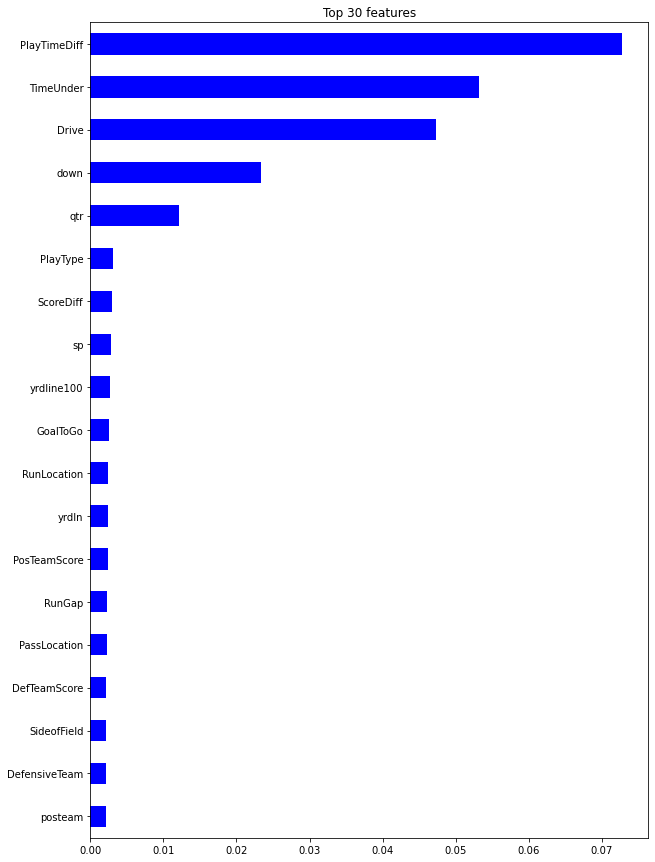

In [89]:
# Get feature importances
n1 = len(X_train.columns)
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_[0:n1], X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 30
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue');

In [91]:
conda install -c conda-forge eli5

Solving environment: done

## Package Plan ##

  environment location: /Users/matthewdmeans/anaconda3/envs/py37

  added / updated specs:
    - eli5


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    eli5-0.10.1                |             py_2          75 KB  conda-forge
    graphviz-2.42.3            |       h98dfb87_0         7.1 MB  conda-forge
    jpeg-9d                    |       h0b31af3_0         251 KB  conda-forge
    python-graphviz-0.14.1     |     pyh9f0ad1d_0          19 KB  conda-forge
    singledispatch-3.4.0.3     |        py36_1000          15 KB  conda-forge
    tabulate-0.8.7             |     pyh9f0ad1d_0          24 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.5 MB

The following NEW packages will be INSTALLED:

  eli5               conda-forge/noarch::eli5-0.10.1-py_2
 

In [92]:
import eli5
from eli5.sklearn import PermutationImportance


/Users/matthewdmeans/anaconda3/envs/py37/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/matthewdmeans/anaconda3/envs/py37/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


NameError: name 'X_val' is not defined

In [93]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_test_transformed = transformers.transform(X_test)

model = RandomForestClassifier(n_estimators=20, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)



feature_names = X_test.columns.tolist()

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_test_transformed, y_test)

eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.0227 ± 0.0021,sp
0.0106 ± 0.0024,RunLocation
0.0078 ± 0.0022,GoalToGo
0.0040 ± 0.0039,yrdline100
0.0037 ± 0.0050,yrdln
0.0020 ± 0.0025,RunGap
0.0018 ± 0.0031,PlayType
-0.0007 ± 0.0024,down
-0.0014 ± 0.0043,PosTeamScore
-0.0022 ± 0.0032,PassLocation


In [97]:
processor = make_pipeline(
    ce.OneHotEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_test_processed = processor.transform(X_test)

eval_set = [(X_train_processed, y_train), 
            (X_test_processed, y_test)]

In [102]:
conda install -c conda-forge pdpbox

Solving environment: done

## Package Plan ##

  environment location: /Users/matthewdmeans/anaconda3/envs/py37

  added / updated specs:
    - pdpbox


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pdpbox-0.2.0               |             py_0        55.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        55.1 MB

The following NEW packages will be INSTALLED:

  pdpbox             conda-forge/noarch::pdpbox-0.2.0-py_0



pdpbox-0.2.0         | 55.1 MB   | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [103]:
from pdpbox.pdp import pdp_isolate, pdp_plot

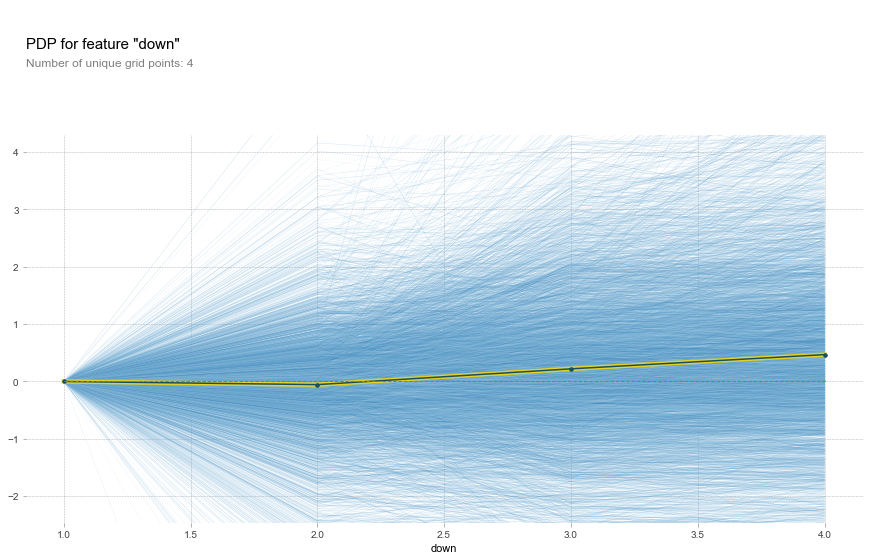

In [105]:
feature = 'down'

isolated = pdp_isolate(
    model= pipeline, 
    dataset= X_test, 
    model_features=X_test.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature, plot_lines=True);

In [106]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7facd42abac8>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7facd4bc3470>})

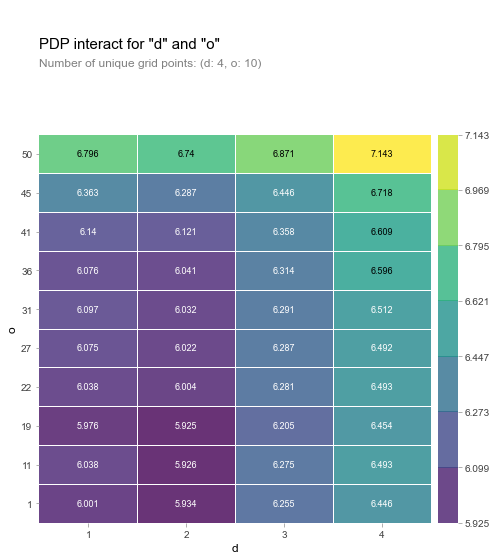

In [110]:
features = ['down', 'yrdln']

interaction = pdp_interact(
    model=pipeline, 
    dataset=X_test, 
    model_features=X_test.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=feature)

In [111]:
processor = make_pipeline(
    ce.OneHotEncoder(),
    SimpleImputer()
)

X_train_processed = processor.fit_transform(X_train)

In [112]:
X_test_processed = processor.transform(X_test)

In [113]:
eval_set = [(X_train_processed, y_train), 
           (X_test_processed, y_test)]

In [146]:
ce.OneHotEncoder(),
RandomForestRegressor(n_estimators=100, n_jobs=-1)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['SideofField', 'posteam', 'DefensiveTeam',
                                     'PlayType', 'PassLocation', 'RunLocation',
                                     'RunGap'])),
                ('randomforestregressor', RandomForestRegressor(n_jobs=-1))])

In [117]:
conda install -c conda-forge shap

Solving environment: done

## Package Plan ##

  environment location: /Users/matthewdmeans/anaconda3/envs/py37

  added / updated specs:
    - shap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    shap-0.35.0                |   py36hcc1bba6_0         399 KB  conda-forge
    tqdm-4.48.0                |     pyh9f0ad1d_0          52 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         451 KB

The following NEW packages will be INSTALLED:

  shap               conda-forge/osx-64::shap-0.35.0-py36hcc1bba6_0
  tqdm               conda-forge/noarch::tqdm-4.48.0-pyh9f0ad1d_0



shap-0.35.0          | 399 KB    | ##################################### | 100% 
tqdm-4.48.0          | 52 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transa

In [128]:
from shap import TreeExplainer, GradientExplainer
import shap

In [124]:
row = X_test.iloc[[10]]
row

,Drive,qtr,down,TimeUnder,PlayTimeDiff,SideofField,yrdln,yrdline100,GoalToGo,posteam,DefensiveTeam,sp,PlayType,PassLocation,RunLocation,RunGap,PosTeamScore,DefTeamScore,ScoreDiff
12055,15,4,2.0,15,0.0,ATL,32.0,68.0,0.0,ATL,WAS,0,Run,None,left,end,6.0,7.0,-1.0


In [125]:
# What was the actual rent for this apartment?
y_test.iloc[[10]]

12055    7
Name: Yards.Gained, dtype: int64

In [147]:
# What does the model predict for this apartment?
model.predict(row)

array([4.64])

In [149]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row)

SHAPError: Model type not yet supported by TreeExplainer: <class 'sklearn.pipeline.Pipeline'>

In [142]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), }
search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=2, 
    scoring='neg_mean_absolute_error', 
    verbose=50, 
    return_train_score=True, 
    n_jobs=6, 
    random_state=42)
search.fit(X_train, y_train);

TypeError: Parameter distribution is not a dict or a list (OneHotEncoder())

In [139]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
model = search.best_estimator_

Best hyperparameters {'max_depth': 20, 'max_features': 0.9507143064099162, 'n_estimators': 156}
Cross-validation MAE nan


In [152]:
enc = ce.OneHotEncoder(handle_unknown='ignore')